<a href="https://colab.research.google.com/github/shkimusw/bigdata/blob/main/%5B10%EC%A3%BC%EC%B0%A8_%EA%B0%95%EC%9D%98%5D_pandas%EB%A1%9C_%EC%9D%B8%EA%B5%AC%EA%B5%AC%EC%A1%B0_%EA%B7%B8%EB%9E%98%ED%94%84_%EA%B7%B8%EB%A6%AC%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#글자깨짐 문제 수정을 위해 다음의 코드 실행 
#단계 1: 폰트 설치
import matplotlib.font_manager as fm
!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()


# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)



In [ ]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

from google.colab import files
uploaded=files.upload()
#업로드하기 전 한글깨짐 문제 해결을 위해 다른이름으로 저장-> CSV UTF-8(쉼표로 분리)로 변경하여 저장하기

Saving age.csv to age.csv


In [ ]:
import pandas as pd
df=pd.read_csv('age.csv', index_col=0, thousands = ',')
df.head()


In [ ]:
#전체 데이터를 총 인구수로 나누기
import pandas as pd
df=pd.read_csv('age.csv', index_col=0, thousands = ',')
df=df.div(df['2022년06월_계_총인구수'],axis=0)
del df['2022년06월_계_총인구수'], df['2022년06월_계_연령구간인구수']  # 열 삭제

df

In [ ]:
#봉담만 추출
a=df.index.str.contains('봉담')
df2=df[a]
df2


In [ ]:
name=input('원하는 지역의 이름: ')
a=df.index.str.contains(name)
df2=df[a]
df2

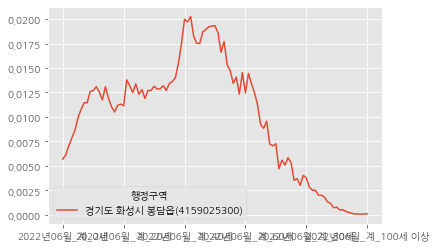

In [ ]:
#그래프 그리기
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df2.T.plot()
plt.show()

궁금한 지역의 인구구조와 가장 비슷한 인구구조를 가진 지역 시각화하기

In [ ]:
import numpy as np
x=df.sub(df2.iloc[0], axis=1)  #df2에는 봉담의 인구비율만 저장했음을 기억하자. 봉담의 0번째 행 값으로 df의 각 행을 차감해준다.
y=np.power(x,2) #x의 제곱=y
z=y.sum(axis=1) #y값을 합한 값

df['z']=z # z 열 생성
df



In [ ]:
x

In [ ]:
y

In [ ]:
z

In [ ]:
i=z.sort_values().index[17:22] #z의 값이 가장 작은 5 지역을 찾는다.
i


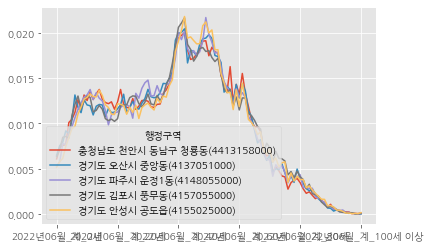

In [ ]:
import matplotlib.pyplot as plt
i=z.sort_values().index[17:22]
del df['z']
df.loc[i].T.plot()

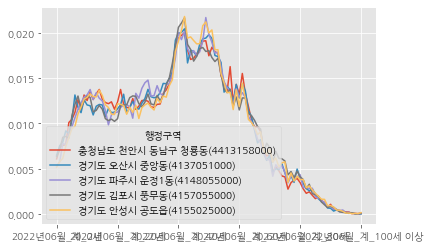

In [ ]:
df.loc[np.power(df.sub(df2.iloc[0], axis=1), 2).sum(axis=1).sort_values().index[17:22]].T.plot()